In [38]:
%matplotlib inline

from modsim import *

from pandas import read_csv
monksealpop = 'Ocean Temperature - Sheet1 (1).csv'
monktable = read_csv(monksealpop, header=None, index_col=0)
monktable.columns = ['offset']
#monktable.col = ['Year']
print(monktable)


      offset
0           
1950  -0.763
1952  -0.447
1953  -0.446
1955  -0.799
1957  -0.390
1960  -0.501
1963  -0.389
1964  -0.705
1966  -0.547
1969  -0.277
1971  -0.629
1972  -0.341
1973  -0.332
1975  -0.638
1977  -0.294
1978  -0.387
1980  -0.210
1982  -0.284
1983  -0.154
1985  -0.367
1987  -0.070
1989  -0.181
1990  -0.004
1992  -0.171
1995  -0.004
1996  -0.031
1998   0.311
1999   0.005
2003   0.340
2004   0.285
2005   0.303
2006     NaN


In [39]:
def plot_population():
    plot(monktable.offset, '--', color='blue', label='data')
    decorate(xlabel='Year',
             ylabel='Offset')


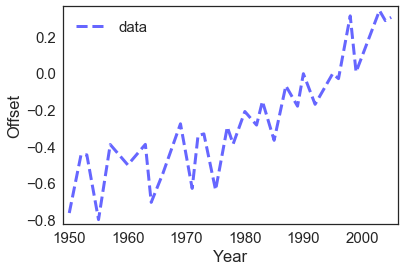

In [40]:
newfig()
plot_population()


In [44]:
t0 = 1950
t_end = monktable.index[-1]

system = System(t0=t0, 
                t_end=t_end,
                p0=-0.755)

def update_func1(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth


In [45]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0,2100):
        results[t+1] = update_func(results[t], t, system)
    system.results = results



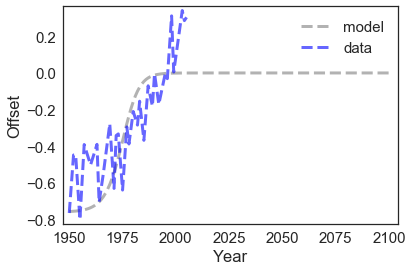

In [95]:
def plot_results(system, title=None):
    newfig()
    plot(system.results, '--', color='gray', label='model')
    plot_population()
    
system.alpha =- 0.25
system.beta = -0.33

run_simulation(system, update_func1)
plot_results(system, title='Quadratic model')


# 